In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv('sample_data/Housing.csv')

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [97]:
print(data.head())
print(data.info())
print(data.dtypes)
print(data.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [98]:
print(data.isna().sum())
data.dropna()
print(data.info())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64

U ovom podatkovnom skupu ima ukupno 545 redaka, odnosno ulaza. Niti jedan od tih ulaza nema Nan vrijednost te droppanjem Nan vrijednosti ne izbacujemo niti jedan redak.

Vidimo da su tipovi podataka int64 i object, odnosno da imamo 6 numeričkih i 7 kategoričkih varijabli. Neke od numeričkih varijabli su diskretne dok su druge kontinuirane (area i price) što znači da bi skaliranje podataka potencijalno moglo pomoći performansama modela

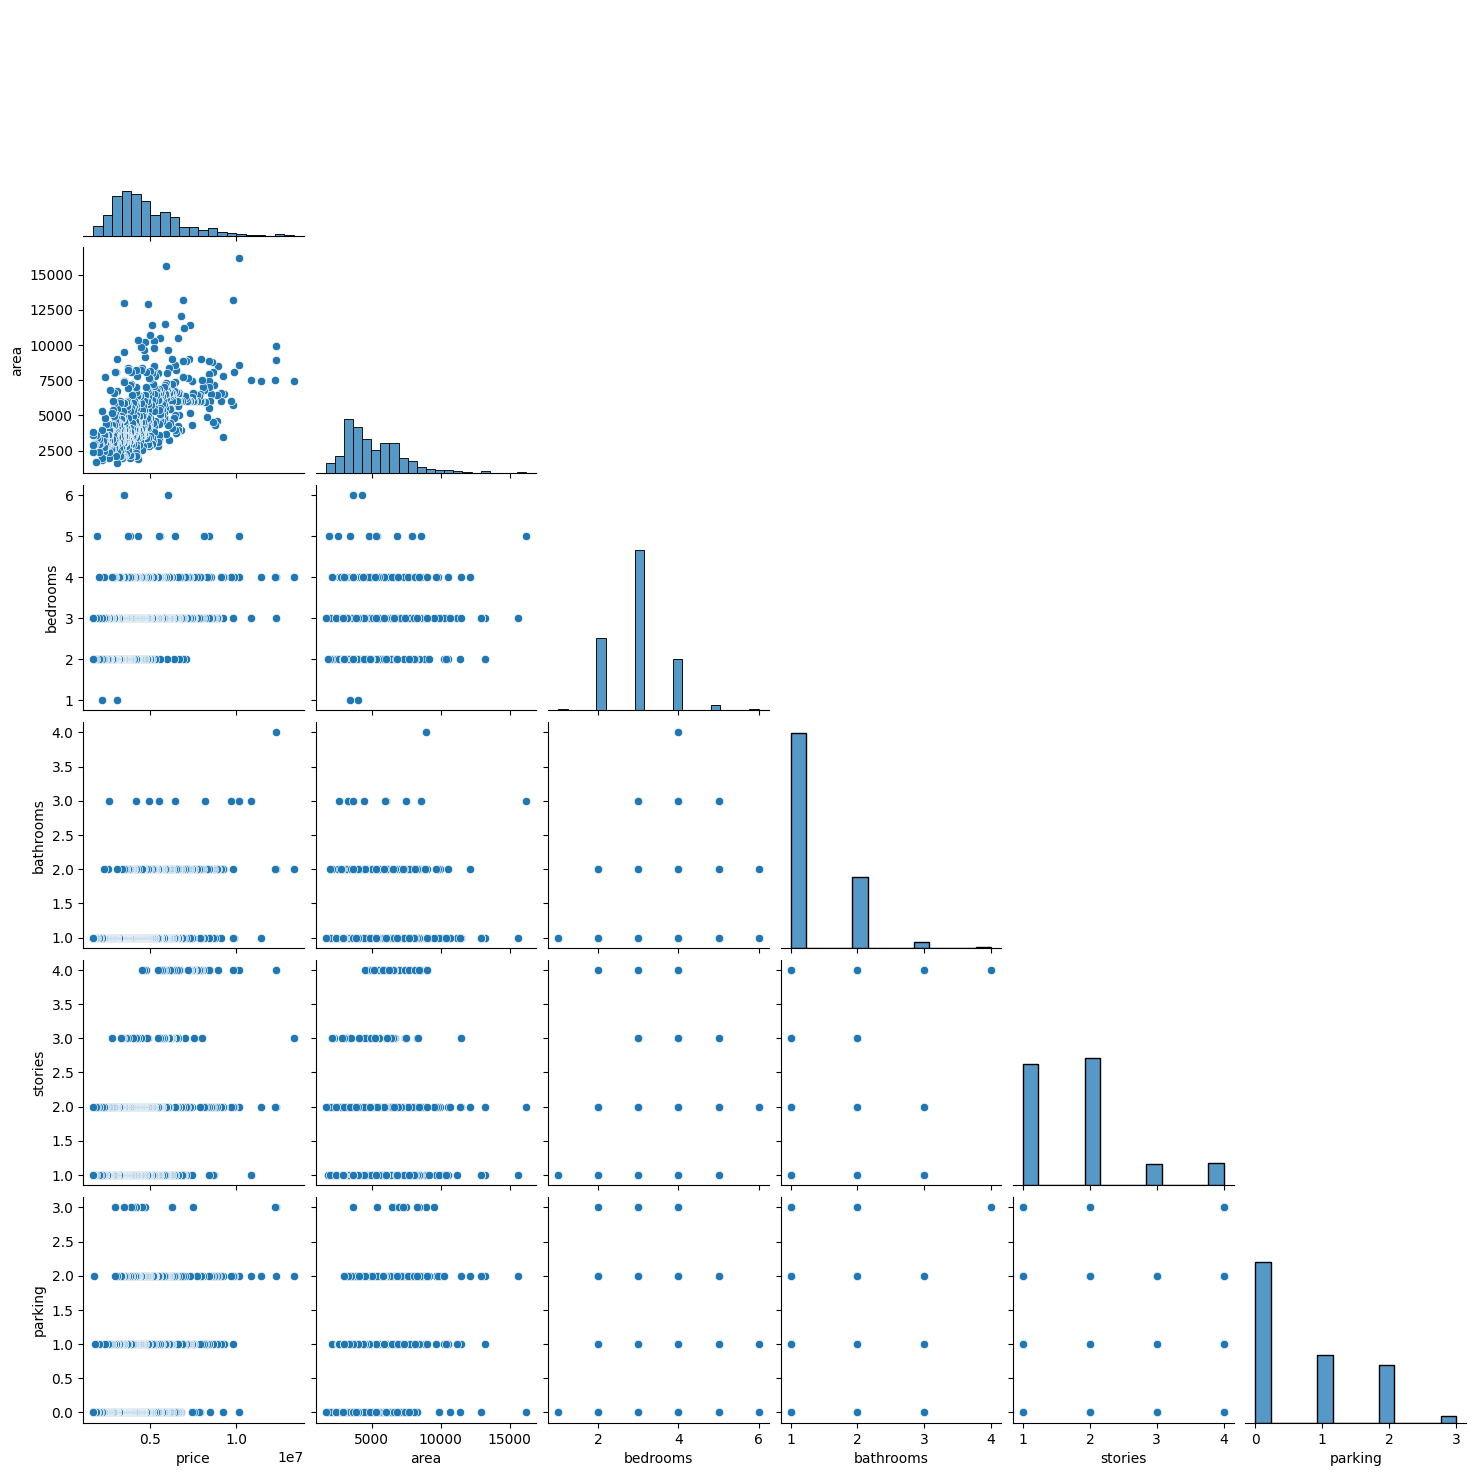

In [99]:
sns.pairplot(data, corner=True)

Iz prikaza relacija između ovih grafova vidljivo je da većina skupa se sastoji od diskretnih varijabli s jedinom iznimkom za price i area. Čisto iz vizualizacije grafovima teško je vidjeti koliko ove varijable koreliraju međusobno.

Pearson Correlation Matrix:
               area     price  bedrooms  bathrooms   stories   parking
area       1.000000  0.535997  0.151858   0.193820  0.083996  0.352980
price      0.535997  1.000000  0.366494   0.517545  0.420712  0.384394
bedrooms   0.151858  0.366494  1.000000   0.373930  0.408564  0.139270
bathrooms  0.193820  0.517545  0.373930   1.000000  0.326165  0.177496
stories    0.083996  0.420712  0.408564   0.326165  1.000000  0.045547
parking    0.352980  0.384394  0.139270   0.177496  0.045547  1.000000


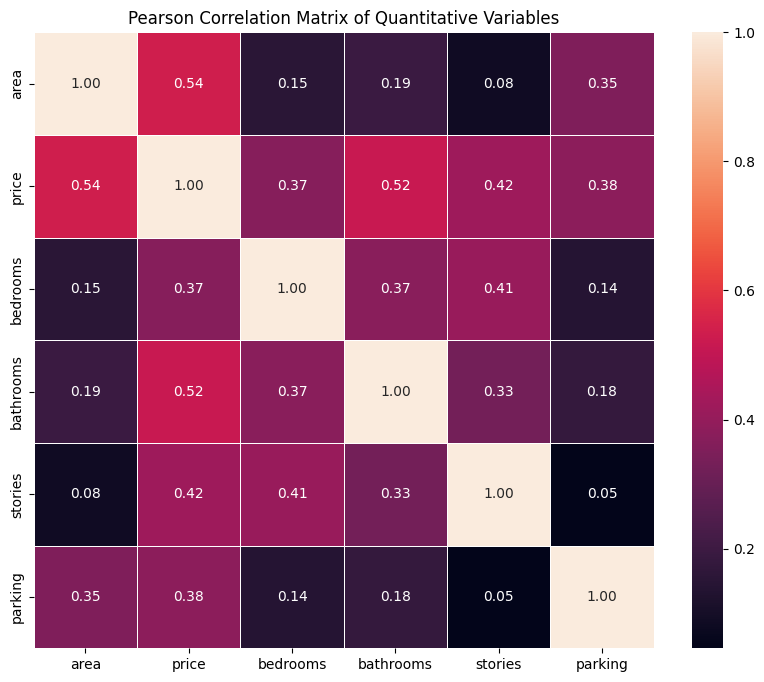

In [100]:
df_quantitative = data[['area', 'price', 'bedrooms', 'bathrooms', 'stories', 'parking']].copy()

correlation_matrix = df_quantitative.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix of Quantitative Variables')
plt.show()

Iz vrijednosti pearsonovih korelacija je vidljivo da najbolje koreliraju cijena i površina kuće te cijena i broj kupaonica u kući. Najgore koreliraju broj katova i parking mjesta te broj katova i površina kuće. Oba slučaja logički imaju smisla za dobivene vrijednosti.

In [101]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

ohe = OneHotEncoder()
le = LabelEncoder()

df_encoded = data.copy()

df_encoded['mainroad'] = le.fit_transform(data['mainroad'])
df_encoded['guestroom'] = le.fit_transform(data['guestroom'])
df_encoded['basement'] = le.fit_transform(data['basement'])
df_encoded['hotwaterheating'] = le.fit_transform(data['hotwaterheating'])
df_encoded['airconditioning'] = le.fit_transform(data['airconditioning'])
df_encoded['prefarea'] = le.fit_transform(data['prefarea'])

furnishingstatus = data['furnishingstatus']
furnishingstatus_encoded = ohe.fit_transform(data[['furnishingstatus']]).toarray().astype(int)
df_encoded = df_encoded.join(pd.DataFrame(furnishingstatus_encoded, columns=['furnished', 'semi-furnished', 'unfurnished']))
df_encoded.drop('furnishingstatus', axis=1, inplace=True)
df_encoded

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


Potrebno je umjesto mapiranja furnishingstatusa napraviti OneHotEncoding kako bismo dobili binarne varijable koje kasnije algoritam moze koristiti. Uzeti ćemo primjer gdje smo enkodirali varijable preko OHE i LabelEncodera

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

chosen_variables = [ 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished']

X = df_encoded[chosen_variables]
X_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i+1)
    for i in range(len(X.columns))
]
print(vif_data)

            feature       VIF
0              area  1.325250
1          bedrooms  1.369477
2         bathrooms  1.286621
3           stories  1.478055
4           parking  1.212837
5          mainroad  1.172728
6         guestroom  1.212838
7          basement  1.323050
8   hotwaterheating  1.041506
9   airconditioning  1.211840
10         prefarea  1.149196
11        furnished       inf
12   semi-furnished       inf
13      unfurnished       inf


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [103]:
chosen_variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnished', 'unfurnished']

X = df_encoded[chosen_variables]
X_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i+1)
    for i in range(len(X.columns))
]
print(vif_data)

            feature       VIF
0              area  1.325250
1          bedrooms  1.369477
2         bathrooms  1.286621
3           stories  1.478055
4           parking  1.212837
5          mainroad  1.172728
6         guestroom  1.212838
7          basement  1.323050
8   hotwaterheating  1.041506
9   airconditioning  1.211840
10         prefarea  1.149196
11        furnished  1.239656
12      unfurnished  1.252939



Spearman Correlation Matrix of Ordinal Variables:
                    price      area  bedrooms  bathrooms   stories  mainroad  \
price            1.000000  0.602859  0.390454   0.479912  0.362856  0.340145   
area             0.602859  1.000000  0.176198   0.213793  0.057768  0.334775   
bedrooms         0.390454  0.176198  1.000000   0.377148  0.504291 -0.004235   
bathrooms        0.479912  0.213793  0.377148   1.000000  0.308769  0.049335   
stories          0.362856  0.057768  0.504291   0.308769  1.000000  0.097185   
mainroad         0.340145  0.334775 -0.004235   0.049335  0.097185  1.000000   
guestroom        0.299990  0.209764  0.090087   0.134360  0.031553  0.092337   
basement         0.230085  0.063181  0.102068   0.109310 -0.132026  0.044002   
hotwaterheating  0.085522 -0.013659  0.036337   0.068498  0.046369 -0.011781   
airconditioning  0.457100  0.284857  0.181529   0.204981  0.235203  0.105423   
parking          0.365372  0.353259  0.146780   0.173982  0.018389  0

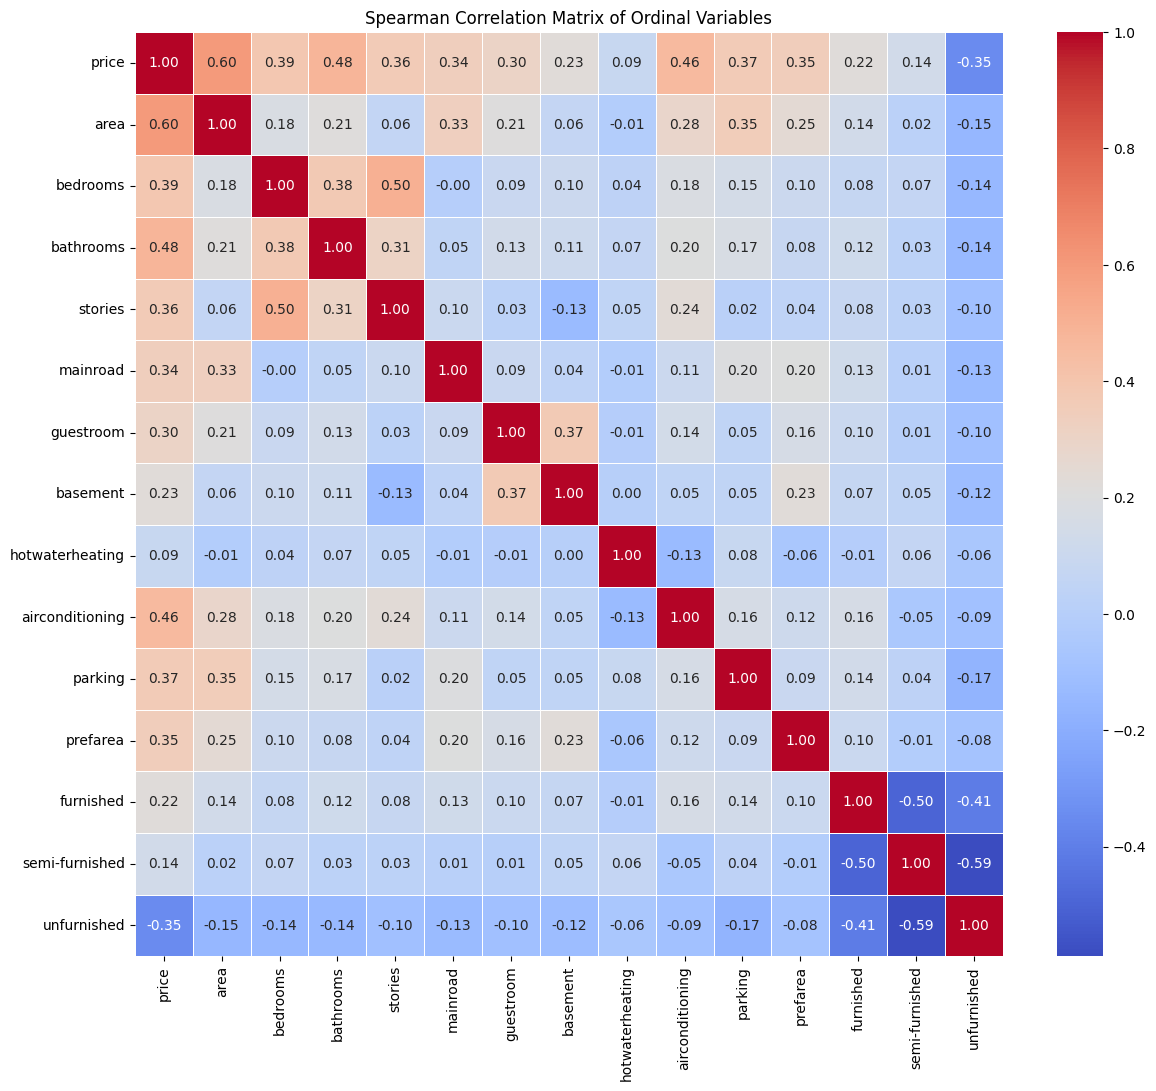

In [104]:
spearman_correlation_matrix = df_encoded.corr(method='spearman')

print("\nSpearman Correlation Matrix of Ordinal Variables:")
print(spearman_correlation_matrix)

plt.figure(figsize=(14, 12))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix of Ordinal Variables')
plt.show()

Iz izračuna VIF-a vidljivo je da je potrebno izbaciti jednu od furnishingstatus varijabli koje smo dobili onehotencodingom. Odabrati ćemo semi-furnished jer on ima najmanju korelaciju s cijenom kuća (koja je naša ciljana varijabla).

Izbacivanjem semi-furnished varijable dobili smo da VIF vrijednosti su vrlo dobre te bi mogle sve varijable ući u model.

In [105]:
from sklearn.preprocessing import StandardScaler

numeric_features = df_encoded[['area', 'bedrooms', 'bathrooms', 'parking']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

df_encoded[['area', 'bedrooms', 'bathrooms', 'parking']] = scaled_features

df_encoded

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,1.046726,1.403419,1.421812,3,1,0,0,0,1,1.517692,1,1,0,0
1,12250000,1.757010,1.403419,5.405809,4,1,0,0,0,1,2.679409,0,1,0,0
2,12250000,2.218232,0.047278,1.421812,2,1,0,1,0,0,1.517692,1,0,1,0
3,12215000,1.083624,1.403419,1.421812,2,1,0,1,0,1,2.679409,1,1,0,0
4,11410000,1.046726,1.403419,-0.570187,2,1,1,1,0,1,1.517692,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,-0.991879,-1.308863,-0.570187,1,1,0,1,0,0,1.517692,0,0,0,1
541,1767150,-1.268613,0.047278,-0.570187,1,0,0,0,0,0,-0.805741,0,0,1,0
542,1750000,-0.705921,-1.308863,-0.570187,1,1,0,0,0,0,-0.805741,0,0,0,1
543,1750000,-1.033389,0.047278,-0.570187,1,0,0,0,0,0,-0.805741,0,1,0,0


Ove varijable nije NUŽNO skalirati, no mogu potencijalno imati bolji utjecaj na performanse modela kada su skalirane

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          9.07e-123
Time:                        11:36:01   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.213e+06   1.26e+05     

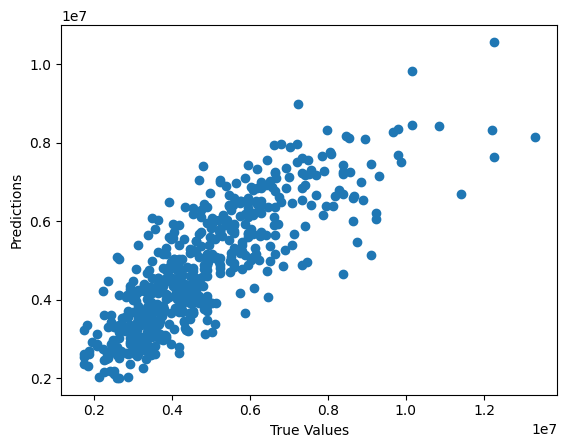

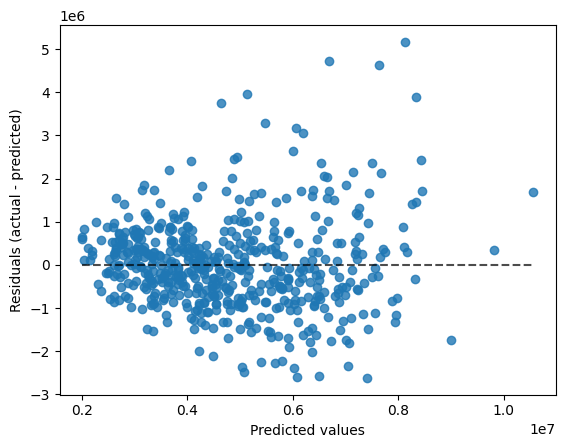

In [106]:
import statsmodels.api as sm
from sklearn.metrics import PredictionErrorDisplay

X = df_encoded.drop(['price'], axis=1)
y = df_encoded['price']

X_sm = sm.add_constant(X)

model = sm.OLS(y, X_sm)
result = model.fit()
print(result.summary())

predictions = result.predict(X_sm)

plt.scatter(y, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

display = PredictionErrorDisplay(y_true=y, y_pred=predictions)
display.plot()

Potrebno je izbaciti ranije spomenutu varijablu s losom multikorelacijom, odnosno semi-furnished stupac

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          9.07e-123
Time:                        11:40:54   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.057e+06   1.77e+05     

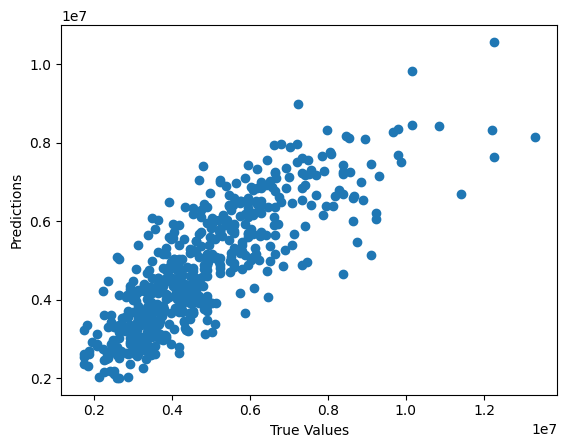

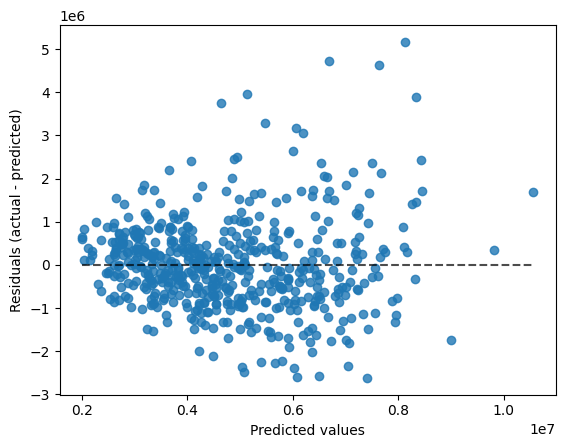

In [114]:
X = df_encoded.drop(['price', 'semi-furnished'], axis=1)
y = df_encoded['price']

X_sm = sm.add_constant(X)

model = sm.OLS(y, X_sm)
result = model.fit()
print(result.summary())
print(result.params)
predictions = result.predict(X_sm)

plt.scatter(y, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

display = PredictionErrorDisplay(y_true=y, y_pred=predictions)
display.plot()

Gledajuci p value koeficijenata, mozemo vidjeti da bedrooms i furnished nemaju znacajan statisticki utjecaj jer p value > 0.05.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     103.1
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          3.24e-124
Time:                        11:42:05   Log-Likelihood:                -8332.9
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     533   BIC:                         1.674e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.023e+06   1.72e+05     

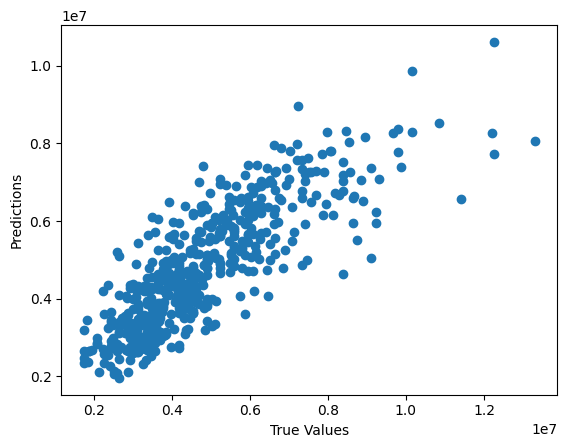

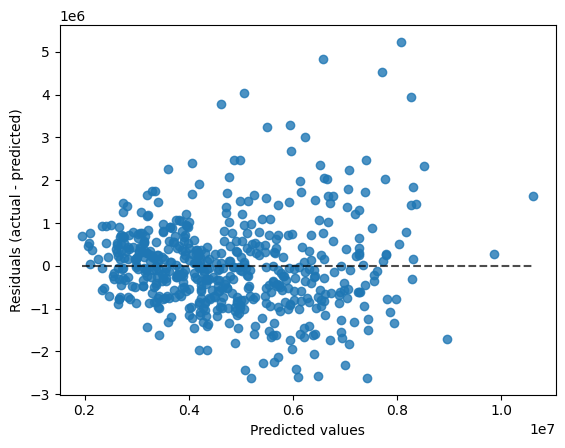

In [116]:
X = df_encoded.drop(['price', 'semi-furnished', 'furnished', 'bedrooms'], axis=1)
y = df_encoded['price']

X_sm = sm.add_constant(X)

model = sm.OLS(y, X_sm)
result = model.fit()
print(result.summary())
print(result.params)
predictions = result.predict(X_sm)

plt.scatter(y, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

display = PredictionErrorDisplay(y_true=y, y_pred=predictions)
display.plot()

Izbacivanjem tih varijabli dobijemo da se R2 ovog modela pogoršao te ćemo radije ostaviti te varijable u skupu predikatora

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Tue, 09 Dec 2025   Prob (F-statistic):          9.07e-123
Time:                        11:54:17   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.057e+06   1.77e+05     

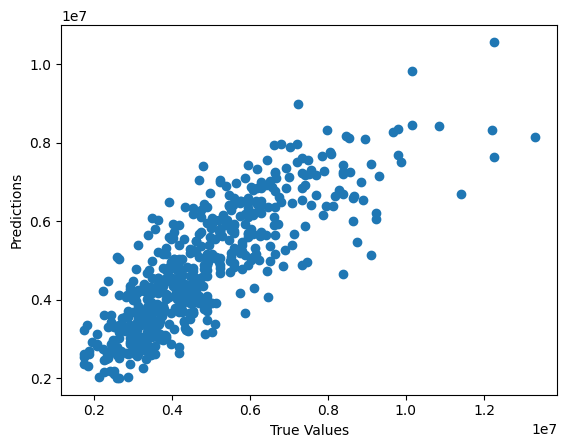

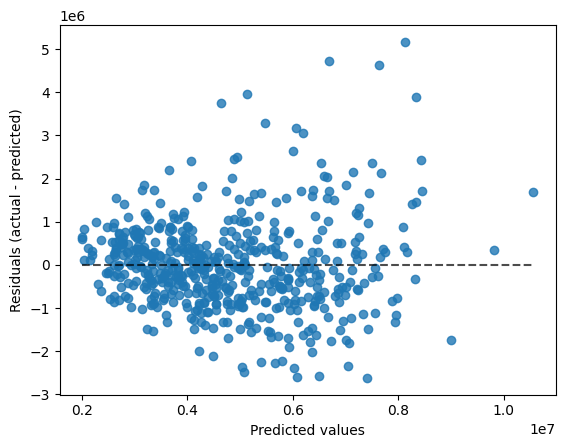

In [119]:
X = df_encoded.drop(['price', 'semi-furnished'], axis=1)
y = df_encoded['price']

X_sm = sm.add_constant(X)

model = sm.OLS(y, X_sm)
result = model.fit()
print(result.summary())
print(result.params)
predictions = result.predict(X_sm)

plt.scatter(y, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

display = PredictionErrorDisplay(y_true=y, y_pred=predictions)
display.plot()

Vidimo da je R2 modela 0.682 sto znaci da osrednje dobro predviđa stvarne vrijednosti, ali da treba znatno poboljšanje. Reziduali su u nekom obliku lijevka što znači da postoji neka veza koju nismo predvidjeli, odnosno postoji neka nelinearna veza između varijabli. Najznačajniji koeficijenti su area, prefarea i airconditioning što ima smisla. R2 adj.

F testom provjeravamo je li dobiveni regresijski model dobar za predviđanje podataka, odnosno postoji li linearna veza između varijabli. S obzirom da p value F-testa je < 0.05, možemo reči da odbacujemo nultu hipotezu, odnosno da postoji neka značajna veza.

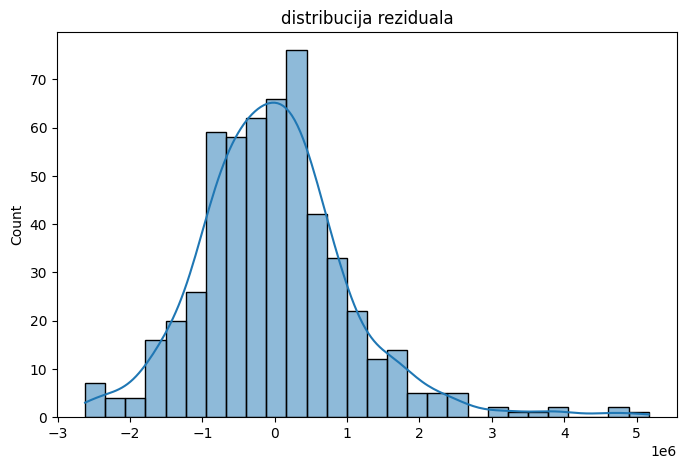

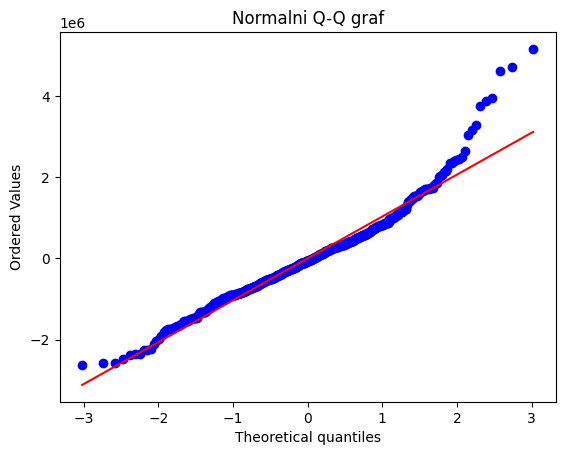

In [118]:
import scipy.stats as stats

residuals = y - predictions

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title(f"distribucija reziduala")
plt.show()


plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normalni Q-Q graf')
plt.show()

Vidimo da su reziduali otprilike normalno distribuirana uz utjecaj outliera. Također iz Q-Q grafa vidimo da postoji odstupanje u krajevima, odnosno kod Outliera.

Ovaj model treba znatnog poboljšanja, bilo to odabirom boljih varijabli, pažnjom na način kako se enkodiraju varijable ili dodatnom analizom korelacija. Potencijalno možemo feature engineerat na način da napravimo nove varijable iz postojećih ili uspostavimo neku nelinearnu vezu transformacijom varijabli

In [127]:


predicted = model.predict([1, 3500, 42, 4, 	2, 	3, 	0, 	1, 	0, 	0, 	0, 	2, 	1, 0])
print(predicted[0])

3741.1728687791438


Zato što su vrijednosti skalirane, nismo

Najznačajniji koeficijenti su area, prefarea i airconditioning što ima smisla.